In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
minerva = pd.read_csv('MinervaShare_1.3.csv')

/tmp/ipykernel_520751/1743690191.py:1: DtypeWarning: Columns (3,4,78,79,81,82,84,85,86,98,99,108,109,118,119,128,129,138,139,167,170,171,172,173,174,176,178,179,180,181,183,186,189,191,192,194,196,205,206,207,209,210,211,212,213,214,216,219,220,221,222,223,224,225,226,227,228,229,230,234,235,236,238,239,240,241,244,245,254,256,270,271,272,273,274,275,276,277,278,284,287,298,299,300,301,303,305,306,309,310,317,318,321,326,327,333,334,335,336,338,339,340,342,347,348,352,354,356,361,362,363,365,366,368,370,371,382,383,386,398,399,400,403,404,412,413,417,426,427,428,429,430,431,433,435,436,447,448,451,463,464,465,468,469,477,478,482,491,492,493,494,495,496,501,505,512,513,528,529,532,534,542,543,556,557,558,559,560,566,570,577,578,593,594,597,599,607,608,621,622,623,626,631,664,688,689,696,729,753,755,761,790,948,950,951,952,960,961,962,980,981,982,990,991,992,1000,1001,1002,1010,1011,1012,1020,1021,1022,1054,1059,1064,1065,1066,1067,1068,1069,1070,1071,1076,1081,1082,1083,1084,1092,1099,1

In [10]:
minerva['Q12_1'].unique()

array(['Never practiced', nan, 'Yes, previously, but not this past year',
       'Yes, this cultivation-year (2023-2024)'], dtype=object)

In [11]:
yes_responses = [
    'Yes, previously, but not this past year',
    'Yes, this cultivation-year (2023-2024)'
]

minerva_filtered = minerva[minerva['Q12_1'].isin(yes_responses)]

minerva_filtered.head()

,ID,Team,Day,Location_village,Location_camp,Location_town,Location_district,Location_province,Coords_set,Coords_mpwd,...,Q15_1,districtName,numHoushold,numAdults,allAdults,Location,Cluster_ID,DistrictID,DistrictAbbr,HHID
46,59,1.0,2,NaN,NaN,Mkushi,Mkushi,Central,2,0.780554,...,Thank you.,NaN,NaN,7.0,0,Mkushi,10203,70,Mkus,Mkus_0059
70,88,1.0,3,kankoyo,Momboshi,NaN,Mkushi,Central,6,13.768999,...,The respondent did not sale any Mainza and soy...,NaN,NaN,2.0,0,Mkushi,10306,70,Mkus,Mkus_0088
76,94,1.0,3,momboshi,Momboshi,NaN,Mkushi,Central,2,0.468659,...,Respondent positively expressed interest to be...,NaN,NaN,4.0,0,Mkushi,10306,70,Mkus,Mkus_0094
153,176,1.0,4,kafwanka,Mukulaulo,NaN,Mkushi,Central,6,3.937994,...,NaN,NaN,NaN,3.0,0,Mkushi,10414,70,Mkus,Mkus_0176
259,284,2.0,5,mwenengola b,Mwanza,NaN,Monze,Southern,1,0.071218,...,NaN,NaN,NaN,3.0,0,Monze,20515,72,Monz,Monz_0284


In [14]:
# select relevant columns
df = minerva_filtered[['Q12_1', 'Location_district', 'Lat_jitter', 'Lon_jitter']]

# export to csv
df.to_csv('chitemene_locations.csv')

In [25]:
# load shapefile
districts_gdf = gpd.read_file('district.shp')
df = pd.read_csv('chitemene_locations.csv')

district_counts = df['Location_district'].value_counts().reset_index()
district_counts.columns = ['Location_district', 'chitemene_yes_count']

,Unnamed: 0,Q12_1,Location_district,Lat_jitter,Lon_jitter
0,46,"Yes, previously, but not this past year",Mkushi,-13.611099,29.402454
1,70,"Yes, previously, but not this past year",Mkushi,-13.924138,29.483804
2,76,"Yes, previously, but not this past year",Mkushi,-13.923246,29.490606
3,153,"Yes, previously, but not this past year",Mkushi,-13.992273,29.453998
4,259,"Yes, previously, but not this past year",Monze,-16.251324,27.747099


In [21]:
district_counts.head()

,Location_district,chitemene_yes_count
0,Mansa,85
1,Kasama,10
2,Mkushi,4
3,Chipili,2
4,Solwezi,2


In [9]:
districts_gdf = districts_gdf.merge(district_counts, how='left', left_on='NAME_2', right_on='Location_district')

# fill NaNs with 0s
districts_gdf['chitemene_yes_count'] = districts_gdf['chitemene_yes_count'].fillna(0)

In [13]:
districts_with_yes = districts_gdf[districts_gdf['chitemene_yes_count'] > 0]

# create sorted list
unique_districts = sorted(districts_with_yes['NAME_2'].unique().tolist())

for district in unique_districts:
    print(district)

Chipili
Kasama
Mansa
Mkushi
Monze
Solwezi


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


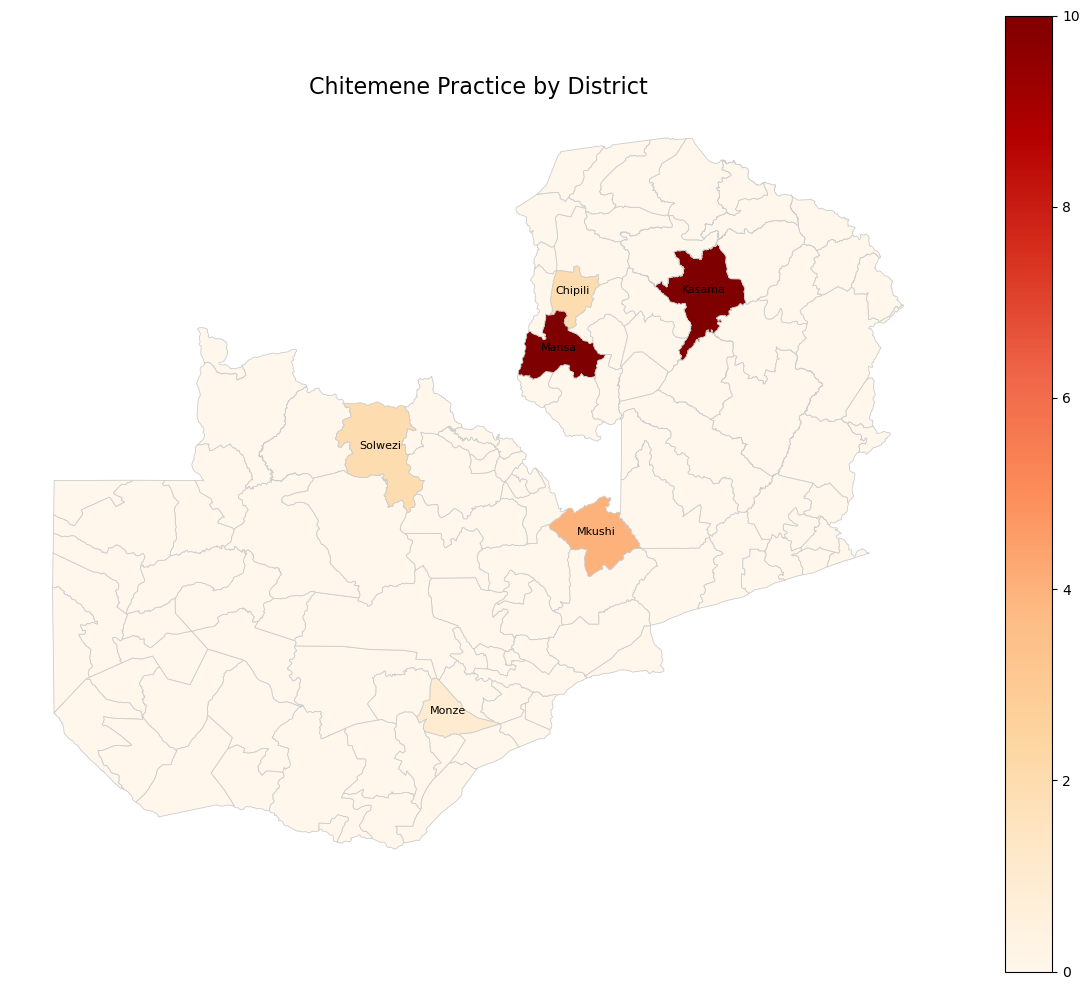

In [33]:
# set up figure
fig, ax = plt.subplots(figsize=(12, 10))

districts_gdf.plot(
    column='chitemene_yes_count',
    cmap='OrRd',
    linewidth=0.6,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    vmin=0,
    vmax=10
)

# add title
ax.set_title('Chitemene Practice by District', fontsize=16)
ax.set_axis_off()

# Label only affected districts (count > 0)
affected = districts_gdf[districts_gdf['chitemene_yes_count'] > 0]

# Calculate centroids for label placement
affected['coords'] = affected['geometry'].centroid

# Add labels
for _, row in affected.iterrows():
    ax.annotate(
        text=row['NAME_2'],  # or your district name column
        xy=(row['coords'].x, row['coords'].y),
        ha='center',
        fontsize=8,
        color='black'
    )
    
plt.tight_layout()
plt.show()